# Algorithmic Trading

## Introduction

 [Document](http://www.xavierdupre.fr/site2013/documents/reports/finance_autostrat.pdf)

### Definitions 

#### Stock exchange / Bourse

A stock exchange or bourse is an organized market where stock brokers and traders can buy and/or sell stocks (also called shares).

#### Stocks / Shares

Stock represents a claim on the company's assets and earnings. As you acquire more stock, your ownership stake in the company becomes greater


#### Trading

Trading is the speculative purchase and sale of financial instruments (stocks, bonds, futures contracts, options, currencies, etc.) with the intention of profiting off a change in price. 


#### Algorithmic trading

Algorithmic trading is the process of using computers programmed to follow a defined set of instructions for placing a trade in order to generate profits at a speed and frequency that is impossible for a human trader.

Apart from profit opportunities for the trader, algo-trading makes markets more liquid and makes trading more systematic by ruling out emotional human impacts on trading activities.

### Differents algorithms for trading




### Problematics

Can we earn money with a "Mean reversing" algorithm ?


### Mean Reversing

intro : http://www.investopedia.com/articles/technical/102201.asp

### Sources

Mean reversing principle : https://marketfy.com/content/74202-how-to-trade-mean-reversion-setups

Bollingers band calculation : https://www.packtpub.com/sites/default/files/5306OS-Chapter-3-Get-into-Terms-with-Commonly-Used-Functions.pdf

Testing site : https://www.quantopian.com


### Presentation

Support en anglais
prez de 21 minutes (repartie équitablement)

Exam : vision d'ensemble 


## Dataset 

(Boursorama Banque : CAC40 17/09/2015 -> 16/09/2016)

In [12]:
# Reading from a file
with open("data.txt", "r") as f:
    data = f.readlines()
    for line in data:
        print(line)

ticker	label	date	open	high	low	close	volume	currency

FR0000120404	ACCOR	17/09/2015	42,755	43,530	42,565	43,405	697301	EUR

FR0000120404	ACCOR	18/09/2015	43,100	43,165	42,270	42,830	1282376	EUR

FR0000120404	ACCOR	21/09/2015	42,950	43,805	42,905	43,395	952046	EUR

FR0000120404	ACCOR	22/09/2015	43,600	43,690	41,420	41,570	1439463	EUR

FR0000120404	ACCOR	23/09/2015	41,545	42,210	40,765	41,890	1131938	EUR

FR0000120404	ACCOR	24/09/2015	41,885	42,430	40,660	40,835	1595345	EUR

FR0000120404	ACCOR	25/09/2015	41,375	42,580	41,375	42,455	1023001	EUR

FR0000120404	ACCOR	28/09/2015	42,215	42,520	40,830	40,930	1794653	EUR

FR0000120404	ACCOR	29/09/2015	40,410	41,060	39,945	40,100	1253655	EUR

FR0000120404	ACCOR	30/09/2015	40,800	42,125	40,660	41,760	1208913	EUR

FR0000120404	ACCOR	01/10/2015	42,480	43,790	41,675	42,005	1829057	EUR

FR0000120404	ACCOR	02/10/2015	42,415	42,630	41,125	42,015	1065077	EUR

FR0000120404	ACCOR	05/10/2015	42,820	44,265	42,820	44,255	1240955	EUR

FR0000120404	ACCOR	06/10

In [13]:
def bolingerBands(arrayValues,arraySize,meanValue, alpha):
    standardDeviationValue = manualStandarDeviation(arrayValues,arraySize,meanValue)
    #standardDeviationValue = np.std(arrayValues,ddof=1)
    upperBand = meanValue + (alpha * standardDeviationValue)
    lowerBand = meanValue - (alpha * standardDeviationValue)
    return [upperBand,lowerBand]


def manualStandarDeviation(arrayValues,arraySize,meanValue):
    sum = 0
    standardDeviationValue = 0
    if(arraySize >= 2):    
        for value in arrayValues:
            sum += np.square(value - meanValue)
        variance = sum/(arraySize -1)
        standardDeviationValue = np.sqrt(variance)
    return standardDeviationValue



def movingAverage(arrayValues,arraySize,meanValues,period):
    #todo: find better method to calculate mean over an array of specific size
    if(arraySize > period ):
        startValue = arraySize - period - 1
        arrayValues = arrayValues[startValue:arraySize -1]
    meanValue = np.mean(arrayValues)
    meanValues.append(meanValue)
    return meanValue


    
def meanRevertingProcessValues(arrayValues,meanValues,bolingers,alpha, period):
    arraySize = len(arrayValues)
    meanValue = movingAverage(arrayValues,arraySize,meanValues,period)
    currentBolingerValue = bolingerBands(arrayValues,arraySize,meanValue, alpha)
    bolingers[0].append(currentBolingerValue[0])
    bolingers[1].append(currentBolingerValue[1])

        
        
def simulateTrade(stockValues, bollingerLowerBand, bollingerUpperBand,capitals):
    sCapital = 100000
    capital = 100000
    capitalInStocks = 0;
    stocksPerAction = 50
    portfolio = []
    i = 0
    for stockValue in stockValues:
        if(stockValue < bollingerLowerBand[i]*0.98 and capital >= stocksPerAction*stockValue):
            portfolio.append(stockValue)
            capital = capital - (stocksPerAction*stockValue)
        if(stockValue > bollingerUpperBand[i]*1.02 and len(portfolio) > 0):
            for stock in portfolio:
                capital += stockValue * stocksPerAction
            portfolio = []
        i += 1
    for stock in portfolio:
        capitalInStocks += stockValues[-1] *stocksPerAction
    capitals.append(capital + capitalInStocks)
        

finished


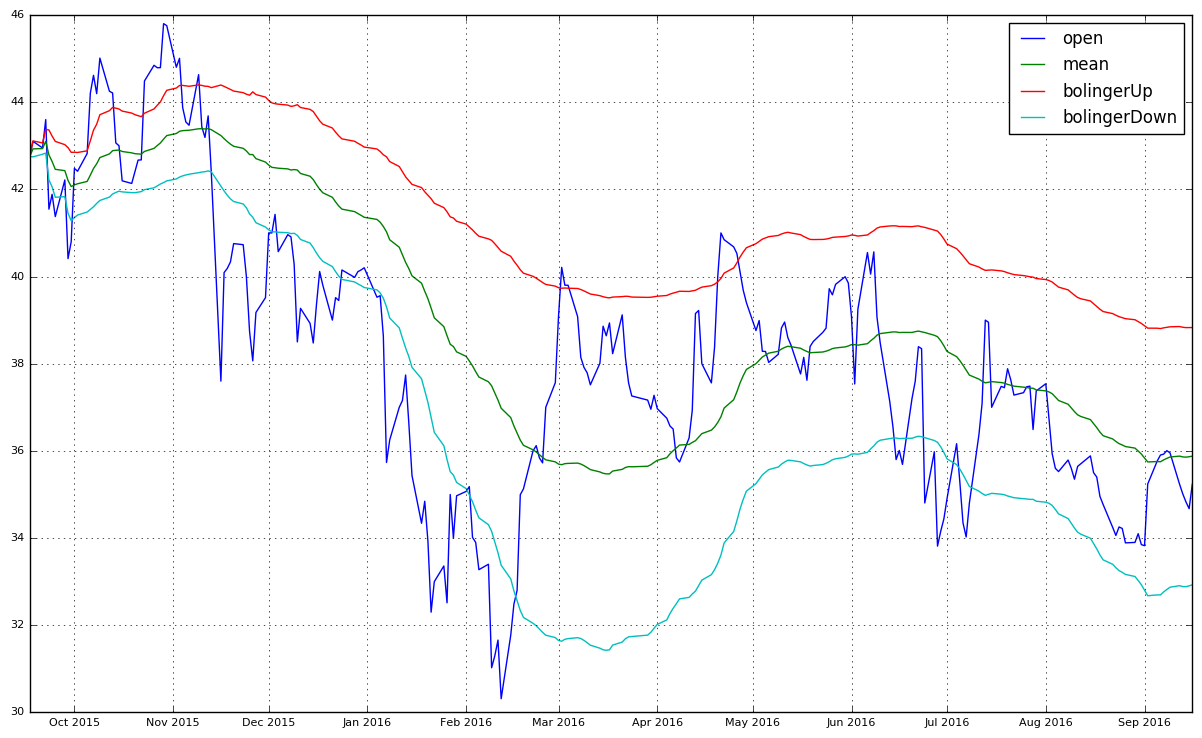

In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pylab


with open("data.txt", "r") as f:
    data = f.readlines()
    dates =[]
    openValues =[]
    closeValues = []
    meanValues = []
    bolingers = [[],[]]
    #print(bolingers)
    for line in data:
        #only total stocks
        if "ACCOR" in line:
            row = line.strip('\n').split('\t')
            sDate = row[2].split('/')
            #focus on date and close market value
            date = datetime.date(int(sDate[2]),int(sDate[1]),int(sDate[0]))
            dates.append(date)
            closeValue = float(row[6].replace(',','.'))
            closeValues.append(closeValue)
            openValue = float(row[3].replace(',','.'))
            openValues.append(openValue)


    alpha = 0.75 
    period = 50
    meanValues = []
    bolingers = [[],[]]
    i = 1
    for openValue in openValues:
        meanRevertingProcessValues(openValues[:i],meanValues,bolingers,alpha,period)
        i += 1
    
    print('finished')
    x = pd.Series(index=dates, data=openValues)
    dataSet = {'date': dates, 
        'open': openValues,'mean': meanValues,'bolingerUp':bolingers[0],'bolingerDown':bolingers[1]}
    frame = pd.DataFrame(dataSet,index=dates,columns=['open','mean','bolingerUp','bolingerDown'])

    #mandatory line to plot in jupyter notebook
    %matplotlib inline 
    open_mean = 0
    #plot size adjustement 
    pylab.rcParams['figure.figsize'] = (15, 9)
    frame.plot(fontsize=8,grid = True)

In [20]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pylab


def simulateOnDataSet(stock):
    with open("data.txt", "r") as f:
        data = f.readlines()
        dates =[]
        openValues =[]
        closeValues = []
        meanValues = []
        bolingers = [[],[]]
        #print(bolingers)
        for line in data:
            #only total stocks
            if stock in line:
                row = line.strip('\n').split('\t')
                sDate = row[2].split('/')
                #focus on date and close market value
                date = datetime.date(int(sDate[2]),int(sDate[1]),int(sDate[0]))
                dates.append(date)
                closeValue = float(row[6].replace(',','.'))
                closeValues.append(closeValue)
                openValue = float(row[3].replace(',','.'))
                openValues.append(openValue)


        alphas = np.arange(0,4,0.01) 
        capitals = [[],[],[],[]]
        periods = [5,10,25,50]
        j = 0
        for period in periods:
            for alpha in alphas:
                i= 0
                meanValues = []
                bolingers = [[],[]]
                for openValue in openValues:
                    meanRevertingProcessValues(openValues,meanValues,bolingers,alpha,period)
                    i+= 1
                simulateTrade(openValues, bolingers[1], bolingers[0], capitals[j])
            j += 1

        print('finished')
        x = pd.Series(index=dates, data=openValues)
        dataSet = {'date': dates, 
            'open': openValues,'mean': meanValues,'bolingerUp':bolingers[0],'bolingerDown':bolingers[1]}
        frame = pd.DataFrame(dataSet,index=dates,columns=['open','mean','bolingerUp','bolingerDown'])

        dataSetCustom = {'alphas' : alphas, 'capitals5': capitals[0],'capitals10': capitals[1],'capitals25': capitals[2],'capitals50': capitals[3]}  
        frame2 = pd.DataFrame(dataSetCustom,index=alphas,columns=['capitals5', 'capitals10','capitals25','capitals50'])

        #mandatory line to plot in jupyter notebook
        %matplotlib inline 
        open_mean = 0
        #plot size adjustement 
        pylab.rcParams['figure.figsize'] = (15, 9)
        #pylab.rcParams['figure.gridsize'] = (1000, 9)
        frame2.plot(fontsize=8,grid = True)

finished


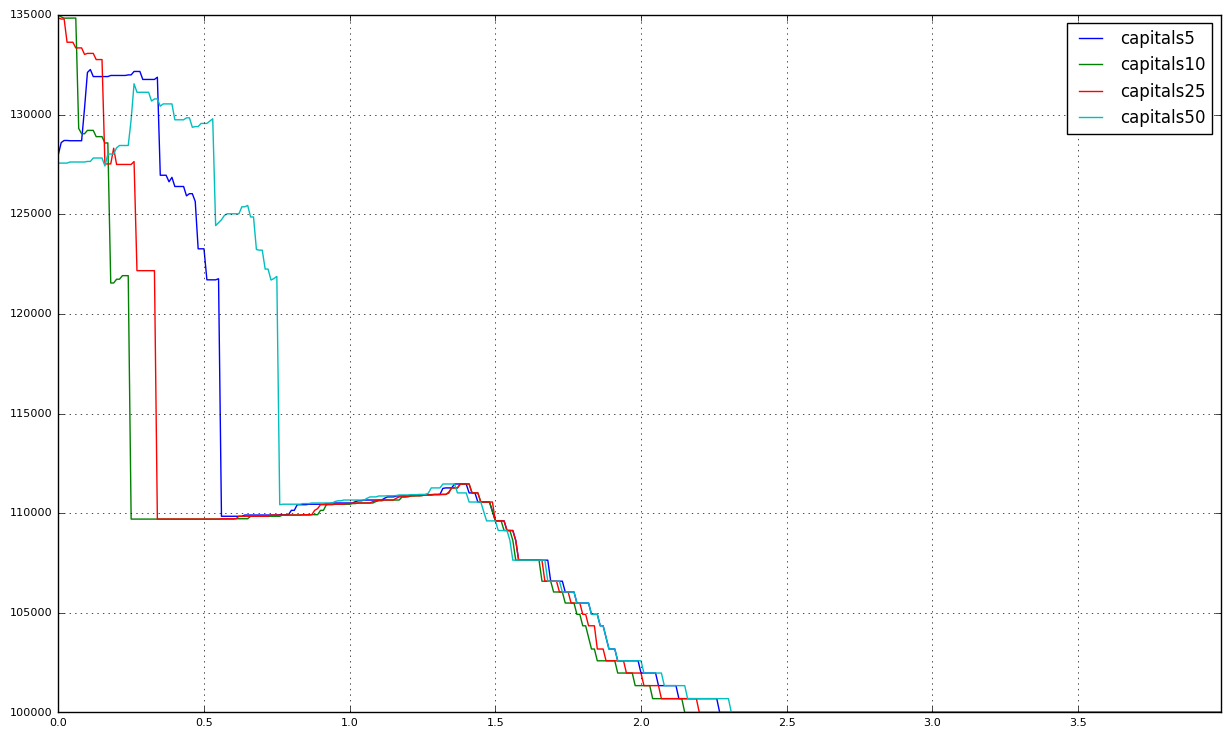

In [21]:
simulateOnDataSet("PERNOD RICARD")

In [17]:
listCompany = []
with open("data.txt", "r") as f:
    data = f.readlines()
    dictCompany = {}
    for line in data:
        row = line.strip('\n').split('\t')
        value = row[1]
        if not value in dictCompany and not value == 'label':
            dictCompany[value] = 0
listCompany = list(dictCompany.keys())
print(listCompany)

['NOKIA', 'SCHNEIDER ELECTRIC', 'KLEPIERRE', 'TECHNIP', 'RENAULT', 'LEGRAND SA', 'PUBLICIS GROUPE', 'TOTAL', 'DANONE', 'ARCELORMITTAL REG', 'VEOLIA ENVIRONN.', 'BNP PARIBAS', 'SOLVAY', 'SOCIETE GENERALE', 'UNIBAIL-RODAMCO', 'PERNOD RICARD', 'ACCOR', 'SODEXO', 'SAFRAN', 'VALEO', 'LAFARGEHOLCIM N', 'SAINT GOBAIN', 'VIVENDI', 'ESSILOR INTERNATIONAL', 'CARREFOUR', 'KERING (Ex: PPR)', 'ENGIE (ex: GDF SUEZ)', 'CREDIT AGRICOLE SA', 'ORANGE (ex: FRANCE TELECOM)', 'PEUGEOT', 'AXA', 'AIRBUS GROUP (Ex : EADS)', 'LVMH MOET VUITTON', "L'OREAL", 'SANOFI', 'AIR LIQUIDE', 'BOUYGUES', 'CAP GEMINI', 'MICHELIN NOM.', 'VINCI']


In [18]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pylab


def simulateCapitalOnDataSet(stock):
    with open("data.txt", "r") as f:
        data = f.readlines()
        dates =[]
        openValues =[]
        closeValues = []
        meanValues = []
        bolingers = [[],[]]
        #print(bolingers)
        for line in data:
            #only total stocks
            if stock in line:
                row = line.strip('\n').split('\t')
                sDate = row[2].split('/')
                #focus on date and close market value
                date = datetime.date(int(sDate[2]),int(sDate[1]),int(sDate[0]))
                dates.append(date)
                closeValue = float(row[6].replace(',','.'))
                closeValues.append(closeValue)
                openValue = float(row[3].replace(',','.'))
                openValues.append(openValue)


        alphas = np.arange(0,2.5,0.01) 
        capitals = []
        periods = [5,10,25,50]
        j = 0
        for alpha in alphas:
            i= 0
            meanValues = []
            bolingers = [[],[]]
            for openValue in openValues:
                meanRevertingProcessValues(openValues,meanValues,bolingers,alpha,period)
                i+= 1
            simulateTrade(openValues, bolingers[1], bolingers[0], capitals)
        return capitals


In [29]:
alphas = np.arange(0,2.5,0.01)
allAlphas = []
capitalsByCompany =[[]]
for companyName in listCompany:
    returnCapital = simulateCapitalOnDataSet(companyName)
    i = 0
    maxValueIndex = 0
    maxCapi = 0
    for capital in returnCapital:
        if capital > maxCapi:
            maxCapi = capital
            maxValueIndex = i
        i += 1
    print( companyName + " best alpha : " + str(alphas[maxValueIndex]) + " with a capital of : " + str(maxCapi))
    allAlphas.append(alphas[maxValueIndex])

NOKIA best alpha : 0.0 with a capital of : 100893.80000000006
SCHNEIDER ELECTRIC best alpha : 1.28 with a capital of : 121196.5
KLEPIERRE best alpha : 0.22 with a capital of : 120321.5
TECHNIP best alpha : 0.16 with a capital of : 129763.5
RENAULT best alpha : 0.1 with a capital of : 115622.0
LEGRAND SA best alpha : 0.47 with a capital of : 125644.0
PUBLICIS GROUPE best alpha : 1.24 with a capital of : 121786.5
TOTAL best alpha : 0.11 with a capital of : 117972.5
DANONE best alpha : 0.2 with a capital of : 120187.5
ARCELORMITTAL REG best alpha : 0.15 with a capital of : 116450.39999999995
VEOLIA ENVIRONN. best alpha : 0.0 with a capital of : 101170.25
BNP PARIBAS best alpha : 0.02 with a capital of : 113093.75
SOLVAY best alpha : 0.69 with a capital of : 132350.0
SOCIETE GENERALE best alpha : 0.0 with a capital of : 105660.25
UNIBAIL-RODAMCO best alpha : 0.25 with a capital of : 128165.0
PERNOD RICARD best alpha : 0.26 with a capital of : 131549.0
ACCOR best alpha : 0.25 with a capital

In [30]:
averageAlphaValue = np.mean(allAlphas)

print('average alpha value : ' + str(averageAlphaValue))

average alpha value : 0.2145
